In [17]:
using JLD2
using Meshfree4ScalarEq.ParticleGrids
using Plots
plotlyjs()

Plots.PlotlyJSBackend()

In [18]:
dataFolder = "$(@__DIR__)/data1D/"
algList = Vector{String}(undef, 0)
fileList = Vector{String}(undef, 0)
for file in readdir(dataFolder)
    if contains(file, "smooth")
        alg = split(file, "_")[1]
        push!(algList, alg)
        push!(fileList, dataFolder*file)
    end
end

D = Dict{String, Matrix{Float64}}()
for (j, file) in enumerate(fileList)
    steps = count((contains(t, "step" ) for t in readdir(file * "/data/")))
    data = Matrix{Float64}(undef, steps, 2)
    i = 1
    for dataFile in readdir(file * "/data/")
        if contains(dataFile, "step")
            d = load(file * "/data/" * dataFile)
            data[i, 1] = d["time"]
            data[i, 2] = sum(particle ->  particle.rho*particle.volume, d["particleGrid"].grid)
            i += 1
        end
    end
    # println(algList[j], " ", data)

    # Sort increase time
    perm = sortperm(data[:, 1])
    data[:, 1] .= data[perm, 1]
    data[:, 2] .= data[perm, 2]

    # Normalise 
    data[:, 2] .= data[:, 2]/data[1, 2]

    # Save to dict
    D[algList[j]] = data
end

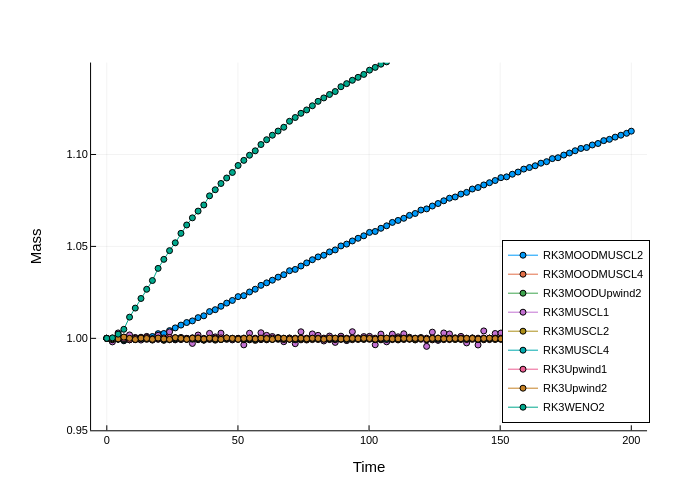

In [19]:
ms = 3
p1 = plot(D[algList[1]][:, 1], D[algList[1]][:, 2], xlabel="Time", ylabel="Mass", ylim=(0.95, 1.15), label=algList[1], markershape=:circle, size=(800, 600), legend=:bottomright, ms=ms)
for (j, algStr) in enumerate(algList)
    if algStr != algList[1]
        plot!(p1, D[algStr][:, 1], D[algStr][:, 2], label=algList[j], markershape=:circle, ms=ms)
    end
end
display(p1)

In [20]:
algList

9-element Vector{String}:
 "RK3MOODMUSCL2"
 "RK3MOODMUSCL4"
 "RK3MOODUpwind2"
 "RK3MUSCL1"
 "RK3MUSCL2"
 "RK3MUSCL4"
 "RK3Upwind1"
 "RK3Upwind2"
 "RK3WENO2"

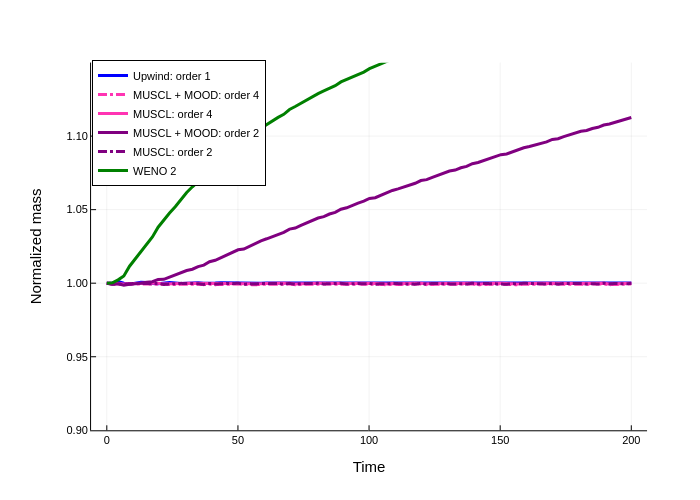

"/scratch/cac13ruw/meshfree4scalareq/numericalExperiments/massLoss/massLoss.pdf"

In [21]:
linewidth = 3
p1 = plot(D["RK3Upwind1"][:, 1], D["RK3Upwind1"][:, 2], xlabel="Time", ylabel="Normalized mass", ylim=(0.9, 1.15), label="Upwind: order 1", linestyle=:solid, linewidth=linewidth, c=:blue, size=(800, 600), legend=:topleft)
plot!(p1, D["RK3MOODMUSCL4"][:, 1], D["RK3MOODMUSCL4"][:, 2], label="MUSCL + MOOD: order 4", linestyle=:dashdot, linewidth=linewidth, c=:maroon1)
plot!(p1, D["RK3MUSCL4"][:, 1], D["RK3MUSCL4"][:, 2], label="MUSCL: order 4", linestyle=:solid, linewidth=linewidth, c=:maroon1)
plot!(p1, D["RK3MOODMUSCL2"][:, 1], D["RK3MOODMUSCL2"][:, 2], label="MUSCL + MOOD: order 2", linestyle=:solid, linewidth=linewidth, c=:purple)
plot!(p1, D["RK3MUSCL2"][:, 1], D["RK3MUSCL2"][:, 2], label="MUSCL: order 2", linestyle=:dashdot, linewidth=linewidth, c=:purple)
plot!(p1, D["RK3WENO2"][:, 1], D["RK3WENO2"][:, 2], label="WENO 2", linestyle=:solid, linewidth=linewidth, c=:green)
# plot!(p1, D["RK3MOODUpwind2"][:, 1], D["RK3MOODUpwind2"][:, 2], label="Upwind + MOOD: order 2", linestyle=:solid, linewidth=linewidth)
display(p1)
savefig(p1, "$(@__DIR__)/massLoss.pdf")